# Ridge regression Algorithm

### Importing libraries

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import numpy as np

### Forming datasets and generating outliers

In [2]:
X, Y = make_regression(n_features=1, noise=10, n_samples=1000)
outliers = Y[950:] - 600
Y_out = np.append(Y[:950], outliers)

### Plotting it

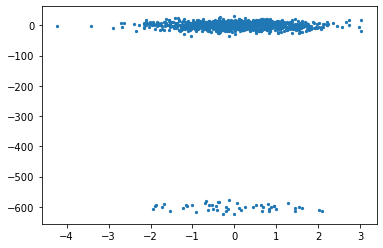

In [3]:
plt.scatter(X, Y_out, s=5)

### Training using linear and ridge regression, predicting by linear regression

In [4]:
lr = LinearRegression()
lr.fit(X, Y)
predict = lr.predict(X)
ridge = Ridge(alpha=0.1)
lr = LinearRegression()
ridge.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1])
lr.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1])

LinearRegression()

In [5]:
print(ridge.coef_)
print(lr.coef_)

[0.44186047 0.44186047]
[0.475 0.475]


### Predicting with outliers

In [6]:
lr = LinearRegression()
lr.fit(X, Y_out)
predicted_outliers = lr.predict(X)

### Plotting both predicted togather

Text(0.5, 1.0, 'Linear Regression')

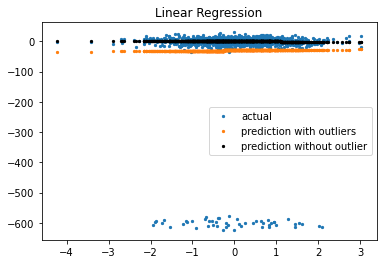

In [7]:
plt.scatter(X, Y_out, s=5, label='actual')
plt.scatter(X, predicted_outliers, s=5, label='prediction with outliers')
plt.scatter(X, predict, s=5, c='k', label='prediction without outlier')
plt.legend()
plt.title('Linear Regression')

### Predicting using ridge and comparing with linear regression

In [8]:
ridge = Ridge(alpha=1000)
ridge.fit(X, Y_out)
predicted_ridge = ridge.predict(X)

Text(0.5, 1.0, 'Linear Regression')

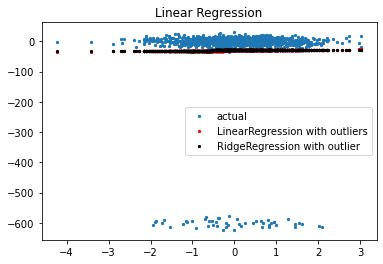

In [9]:
plt.scatter(X, Y_out, s=5, label='actual')
plt.scatter(X, predicted_outliers, s=5, c='r', label='LinearRegression with outliers')
plt.scatter(X, predicted_ridge, s=5, c='k', label='RidgeRegression with outlier')
plt.legend()
plt.title('Linear Regression')

In [10]:
ridge.coef_

array([0.53387809])

### Checking effect of diffrent values of alphas

In [11]:
X, y, w = make_regression(n_samples=10, n_features=10, coef=True, random_state=1, bias=3.5)
w

array([80.71051956, 10.74941291, 38.78606441, 13.64552257,  5.99176895,
       86.35418546, 12.13434557,  4.45518785, 74.71216427, 55.6240234 ])

### generating alphas

In [12]:
alphas = np.logspace(-6, 6, 200)
alphas[:20]

array([1.00000000e-06, 1.14895100e-06, 1.32008840e-06, 1.51671689e-06,
       1.74263339e-06, 2.00220037e-06, 2.30043012e-06, 2.64308149e-06,
       3.03677112e-06, 3.48910121e-06, 4.00880633e-06, 4.60592204e-06,
       5.29197874e-06, 6.08022426e-06, 6.98587975e-06, 8.02643352e-06,
       9.22197882e-06, 1.05956018e-05, 1.21738273e-05, 1.39871310e-05])

### making list of coefficients for diffrent alphas

In [13]:
coefficients = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefficients.append(ridge.coef_)

### observe the effect

Text(0.5, 1.0, 'Ridge coefficients as a function of the regularization')

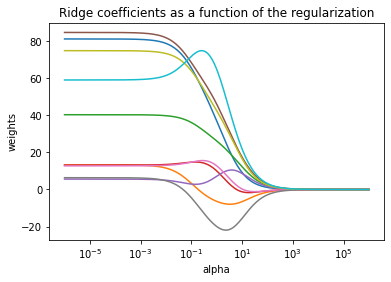

In [14]:
ax = plt.gca()
ax.plot(alphas, coefficients)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')